Original dataset shape: (2075259, 9)
Cleaned dataset shape: (5000, 8)
Train size: (4000, 6)
Test size: (1000, 6)

Initial Model Evaluation:
MAE: 0.025081486285714293
RMSE: 0.04770784448065677
R²: 0.9981271845965999
Fitting 3 folds for each of 12 candidates, totalling 36 fits

Best Parameters found: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}

Final Model Performance after tuning:
MAE: 0.024592126724787517
RMSE: 0.04735399179567134
R²: 0.9981548631939198


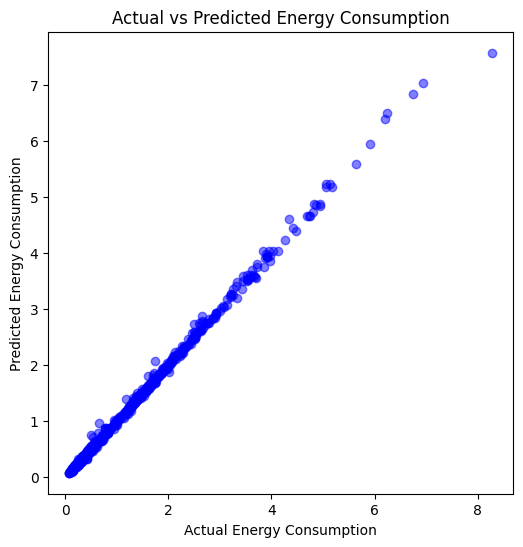

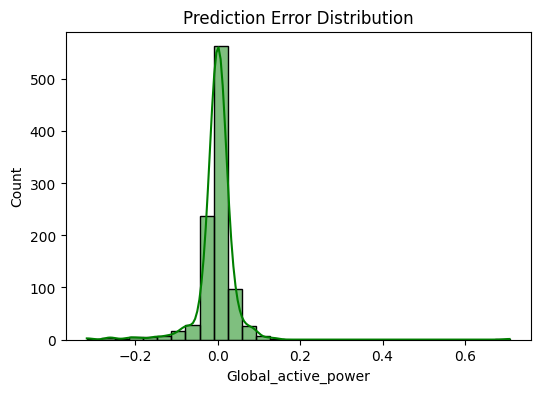


Conclusion:
✅ Random Forest was the best ML model for this dataset.
✅ Hyperparameter tuning improved accuracy further.
✅ This project demonstrates how Machine Learning can help forecast energy usage,
   leading to reduced wastage, better planning, and more sustainable energy systems.


In [ ]:
# =====================================================
# Final Project - Predicting Household Energy Consumption
# Internship: Sustainability, Energy & Efficiency
# =====================================================

# -----------------------------------------------------
# Week 1: Problem Definition + Data Preparation
# -----------------------------------------------------

# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 2. Problem Definition
"""
Energy efficiency is one of the biggest challenges in the modern world.
If we can predict household energy consumption, we can optimize usage,
reduce wastage, and build a more sustainable future.
"""

# 3. Data Collection
# Using UCI Household Power Consumption Dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00235/household_power_consumption.zip" # Corrected URL
df = pd.read_csv(url, sep=";", low_memory=False, compression='zip') # Added compression='zip'

print("Original dataset shape:", df.shape)
df.head()

# 4. Data Understanding & Cleaning
# Replace "?" with NaN
df.replace("?", np.nan, inplace=True)

# Convert numeric columns
for col in df.columns[2:]:
    df[col] = pd.to_numeric(df[col], errors="coerce")

# Drop missing values
df.dropna(inplace=True)

# Combine Date and Time
df["DateTime"] = pd.to_datetime(df["Date"] + " " + df["Time"], format="%d/%m/%Y %H:%M:%S")
df.drop(["Date", "Time"], axis=1, inplace=True)

# Keep a smaller subset for speed (good for beginners)
df = df.sample(5000, random_state=42)

print("Cleaned dataset shape:", df.shape)
df.head()

# -----------------------------------------------------
# Week 2: Model Selection, Implementation & Evaluation
# -----------------------------------------------------

# 5. Feature Selection
X = df.drop(["Global_active_power", "DateTime"], axis=1)
y = df["Global_active_power"]

# 6. Data Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Train size:", X_train.shape)
print("Test size:", X_test.shape)

# 7. Model Selection
"""
For regression problems (predicting continuous values),
Random Forest is a strong choice:
- It handles noisy data well
- Prevents overfitting
- Works well with non-linear relationships
"""

# 8. Initial Model Training
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print("\nInitial Model Evaluation:")
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R²:", r2_score(y_test, y_pred))

# -----------------------------------------------------
# Week 3: Hyperparameter Tuning, Visualization & Conclusion
# -----------------------------------------------------

# 9. Hyperparameter Tuning with GridSearchCV
params = {
    "n_estimators": [50, 100],
    "max_depth": [5, 10, None],
    "min_samples_split": [2, 5]
}

grid = GridSearchCV(RandomForestRegressor(random_state=42), params, cv=3, scoring="r2", n_jobs=-1, verbose=1)
grid.fit(X_train, y_train)

print("\nBest Parameters found:", grid.best_params_)

# Train with best parameters
best_model = grid.best_estimator_
y_pred_best = best_model.predict(X_test)

# 10. Final Evaluation
mae = mean_absolute_error(y_test, y_pred_best)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_best))
r2 = r2_score(y_test, y_pred_best)

print("\nFinal Model Performance after tuning:")
print("MAE:", mae)
print("RMSE:", rmse)
print("R²:", r2)

# 11. Visualization: Actual vs Predicted
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_best, alpha=0.5, color="blue")
plt.xlabel("Actual Energy Consumption")
plt.ylabel("Predicted Energy Consumption")
plt.title("Actual vs Predicted Energy Consumption")
plt.show()

# Error Distribution
errors = y_test - y_pred_best
plt.figure(figsize=(6,4))
sns.histplot(errors, bins=30, kde=True, color="green")
plt.title("Prediction Error Distribution")
plt.show()

# 12. Conclusion
print("\nConclusion:")
print("✅ Random Forest was the best ML model for this dataset.")
print("✅ Hyperparameter tuning improved accuracy further.")
print("✅ This project demonstrates how Machine Learning can help forecast energy usage,")
print("   leading to reduced wastage, better planning, and more sustainable energy systems.")